In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/var/folders/0p/0_nrj3cj5ys8d7p8y3khk3980000gn/T/ipykernel_91842/768594374.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period='1y')#, auto_adjust=False)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2024-08-14,537.060791,538.255927,533.475442,536.171839,42446900,525.139334,537.946844,-1.0,0.003155,-0.003155
2024-08-15,546.266235,546.552646,542.127778,542.740146,60846800,526.132968,537.846247,-1.0,0.020349,-0.020241
2024-08-16,547.490906,548.192193,544.478439,544.636444,44430700,528.247623,537.589813,-1.0,0.022637,-0.022438
2024-08-19,552.725769,552.725769,547.046504,547.905797,39121800,532.418671,537.704313,-1.0,0.032415,-0.031785
2024-08-20,551.826904,553.940593,550.473763,552.271380,33732300,536.028705,537.657121,-1.0,0.030736,-0.030210
...,...,...,...,...,...,...,...,...,...,...
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,604.531140,596.324253,1.0,0.154058,0.065470
2025-07-01,617.650024,618.830017,615.520020,616.359985,70030100,606.205786,597.676403,1.0,0.153684,0.065125
2025-07-02,620.450012,620.489990,616.609985,617.239990,66510400,608.673907,599.123761,1.0,0.158914,0.069954


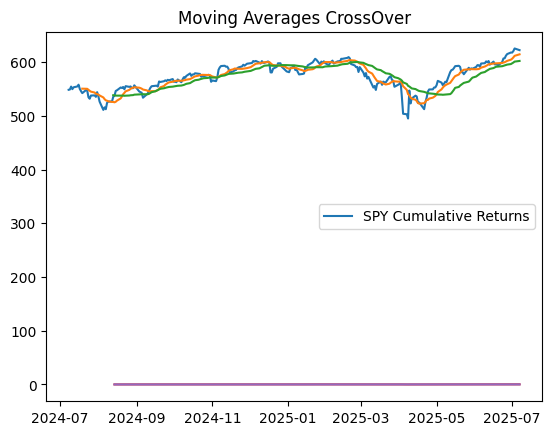

In [ ]:
TICKER = 'SPY'
WINDOW = 3
FAST = 10
SLOW = 27
LOOPBACK = 10000

def get_data():
    df = yf.download(TICKER, period='1y')#, auto_adjust=False)
    df.columns = df.columns.get_level_values(0)
    
    return df

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()

    subsection = df.iloc[-LOOPBACK:,:]

    plt.plot(subsection['Close'])
    plt.plot(subsection[f'{FAST}_ma'])
    plt.plot(subsection[f'{SLOW}_ma'])

    plt.legend(['Close', f'{FAST}_ma',f'{SLOW}_ma'])
    plt.title('Moving Averages CrossOver')

    return df.dropna()

def add_strategy(df, fast, slow):
    # df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{SLOW}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns']  = (1+df['Close'].pct_change()).cumprod() -1
    df['Strategy_Returns'] = (1+df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    subsection = df.iloc[-LOOPBACK:,:]

    plt.plot(subsection['Asset_Returns'])
    plt.plot(subsection['Strategy_Returns'])

    plt.legend([f'{ticker} Cumulative Returns','{fast} - {slow} CrossOver strategy returns'])
    plt.title('Moving Averages CrossOver')
    
    return df.dropna()

df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df,TICKER)

df


Text(0.5, 1.0, 'Moving Averages CrossOver')

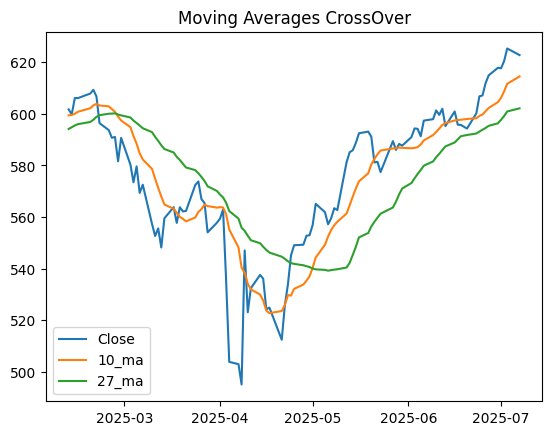

In [16]:
# iloc rows, columns
subsection = df.iloc[-100:,:]

plt.plot(subsection['Close'])
plt.plot(subsection[f'{FAST}_ma'])
plt.plot(subsection[f'{SLOW}_ma'])

plt.legend(['Close', f'{FAST}_ma',f'{SLOW}_ma'])
plt.title('Moving Averages CrossOver')

In [ ]:


def test_strategy(df):
    df['Asset_Culmulative']  = np.cumprod(1+df['Close'].pct_change()) -1
    df['Strategy_Culmulative'] = np.cumprod(1+df['Close'].pct_change() * df['Strategy']) -1
    
    plt.plot(df['Asset_Culmulative'])
    plt.plot(df['Strategy_Culmulative'])
    plt.title(f'{TICKER} Close vs Moving Average')
    plt.legend([f'{TICKER} Close Price', f'{WINDOW} Moving Average'])
    
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

/var/folders/0p/0_nrj3cj5ys8d7p8y3khk3980000gn/T/ipykernel_91842/695304847.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period='1y')#, auto_adjust=False)
[*********************100%***********************]  1 of 1 completed


KeyError: 'MA'